In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [ ]:
#Problem 1
def primal_dual_barrier_method(c,A,b,tol=1e-4,sigma = 0.25):
    m, n = A.shape
    x = np.ones(n)
    s = np.ones(n)
    lmbda = np.ones(m)

    def compute_residuals(x,s,lmbda):
        r_dual = A.T @ lmbda + s- c
        r_cent = np.multiply(x,s) - mu * np.ones(n)
        r_pri = A @ x - b
        return r_dual, r_cent, r_pri

    while True:
        #duality gap
        gap = np.dot(s,x)
        if gap < tol:
            break
        # barrier parameter
        mu = sigma * gap / n

        r_dual, r_cent, r_pri = compute_residuals(x,s,lmbda)

        KKT = np.block([
            [np.zeros((n,n)), A.T, np.eye(n)],
            [A, np.zeros((m,m)), np.zeros((m,n))],
            [np.diag(s), np.zeros((n,m)), np.diag(x)]
        ])

        rhs = -np.concatenate([r_dual, r_pri, r_cent])

        delta = np.linalg.solve(KKT, rhs)

        delta_x = delta[:n]
        delta_lambda = delta[n:n+m]
        delta_s = delta[n+m:]
        alpha = 1
        #line search
        while np.any(x+ alpha*delta_x <= 0) or np.any(s+alpha*delta_s <=0):
            alpha *= .5

        x += alpha * delta_x
        lmbda += alpha*delta_lambda
        s += alpha*delta_s
    return x

c = np.array([-2,-5,0,0,0])
A = np.array([
    [1,0,1,0,0],
    [0,1,0,1,0],
    [1,1,0,0,1]
])
b = np.array([4,6,8])
solution = primal_dual_barrier_method(c,A,b)
print("optimal solution:", solution)

optimal solution: [1.99999682e+00 5.99999364e+00 2.00000318e+00 6.35597335e-06
 9.53387914e-06]


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.7999999999999972
            Iterations: 4
            Function evaluations: 12
            Gradient evaluations: 4
Optimal value: 0.7999999999999972
Optimal x: 1.3999999898812872
Optimal y: 1.6999999949406455


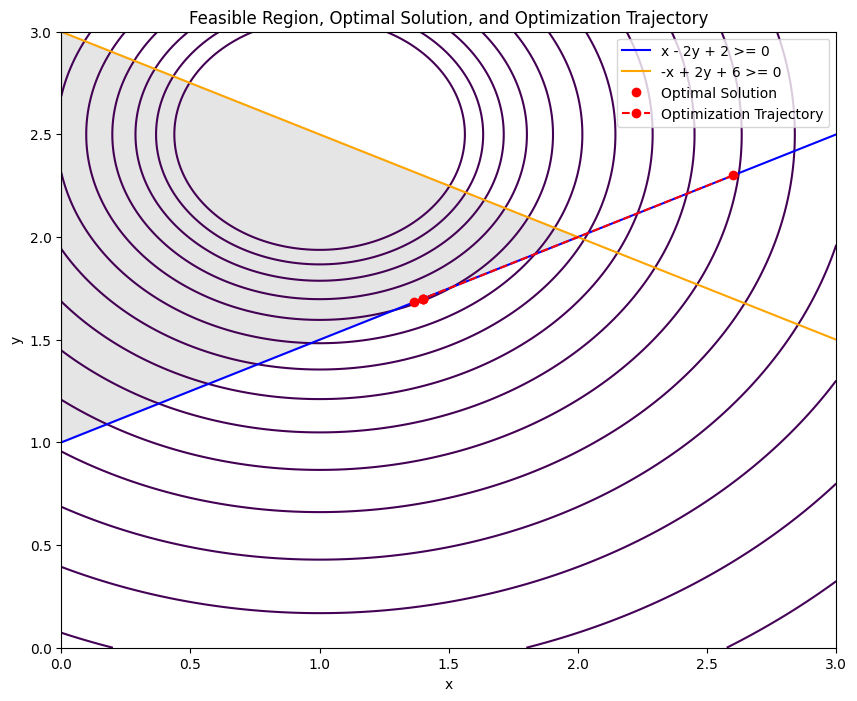

In [ ]:
#Problem 2



from scipy.optimize import minimize

# Define the objective function
def objective(vars):
    x, y = vars
    return (x - 1)**2 + (y - 2.5)**2

# Define the constraints
constraints = [
    {'type': 'ineq', 'fun': lambda vars: vars[0] - 2 * vars[1] + 2},  # x - 2y + 2 >= 0
    {'type': 'ineq', 'fun': lambda vars: -vars[0] + 2 * vars[1] + 6},  # -x + 2y + 6 >= 0
    {'type': 'ineq', 'fun': lambda vars: -vars[0] + 2 * vars[1] + 2},  # -x + 2y + 2 >= 0
    {'type': 'ineq', 'fun': lambda vars: vars[0]},  # x >= 0
    {'type': 'ineq', 'fun': lambda vars: vars[1]}   # y >= 0
]

# Initial guess
x0 = [0.5, 0.5]

# Lists to store the trajectory
trajectory = []

# Callback function to store the trajectory
def callback(vars):
    trajectory.append(vars)

# Solve the problem using SLSQP method which is a type of interior-point method
solution = minimize(objective, x0, method='SLSQP', constraints=constraints, options={'disp': True}, callback=callback)

# Extract the solution
x_opt, y_opt = solution.x
optimal_value = solution.fun

# Output the results
print(f"Optimal value: {optimal_value}")
print(f"Optimal x: {x_opt}")
print(f"Optimal y: {y_opt}")

# Convert the trajectory list to numpy array for easier handling
trajectory = np.array(trajectory)

# Plotting the feasible domain and the objective function contours
x_vals = np.linspace(0, 3, 400)
y_vals = np.linspace(0, 3, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = (X - 1)**2 + (Y - 2.5)**2

plt.figure(figsize=(10, 8))
CS = plt.contour(X, Y, Z, levels=np.logspace(-0.5, 3, 35), cmap='viridis')

# Plotting constraints lines
plt.plot(x_vals, (x_vals + 2)/2, label='x - 2y + 2 >= 0', color='blue')
plt.plot(x_vals, (6 - x_vals)/2, label='-x + 2y + 6 >= 0', color='orange')

# Fill the feasible region
plt.fill_between(x_vals, np.maximum((x_vals + 2)/2, 0), np.minimum((6 - x_vals)/2, 3), 
                 where=(x_vals <= 2), alpha=0.2, color='gray')

# Plot the optimal point
plt.plot(x_opt, y_opt, 'ro', label='Optimal Solution')

# Plot the trajectory
plt.plot(trajectory[:, 0], trajectory[:, 1], 'r--', marker='o', label='Optimization Trajectory')

plt.xlim((0, 3))
plt.ylim((0, 3))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Feasible Region, Optimal Solution, and Optimization Trajectory')
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8a1d2c59-96eb-4631-b21d-de35474b063e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>